In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

In [2]:
brain_mri=nib.load('dataset/avg152T1_LR_nifti.nii')
brain_mri_data = brain_mri.get_fdata()

In [4]:
brain_mri_data.shape

(91, 109, 91)

In [6]:
affine=brain_mri.affine
shape=brain_mri.shape
print(affine,shape)

[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]] (91, 109, 91)


In [7]:
brain_mri.header.get_zooms()

(2.0, 2.0, 2.0)

In [9]:
#checking diff axis
nib.aff2axcodes(affine)

('L', 'A', 'S')

Our Affine has 
- 1st axis -> Right to left [Saggital]
- 2nd axis -> posterior to Anterior [Coronal]
- 3rd axis -> Interior to superior [axial]

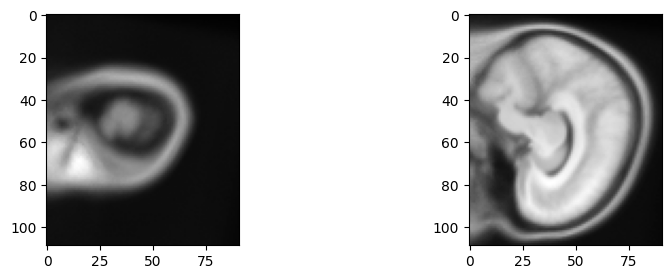

In [18]:
fig,ax=plt.subplots(1,2,figsize=(10,3))
ax[0].imshow(brain_mri_data[10,:,:],cmap='gray')
ax[1].imshow(brain_mri_data[50,:,:],cmap='gray');

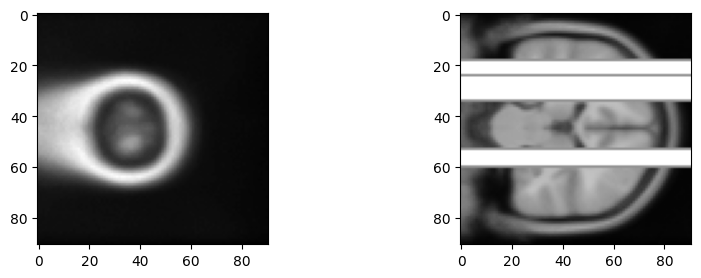

In [19]:
fig,ax=plt.subplots(1,2,figsize=(10,3))
ax[0].imshow(brain_mri_data[:,10,:],cmap='gray')
ax[1].imshow(brain_mri_data[:,50,:],cmap='gray');

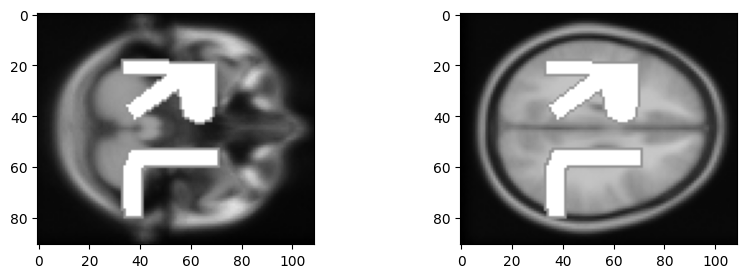

In [22]:
fig,ax=plt.subplots(1,2,figsize=(10,3))
ax[0].imshow(brain_mri_data[:,:,10],cmap='gray')
ax[1].imshow(brain_mri_data[:,:,50],cmap='gray');

In [25]:
voxel_cord=np.array([0,0,0,1])
physica_cord=np.dot(affine,voxel_cord)
physica_cord

array([  90., -126.,  -72.,    1.])

In [27]:
affine[:,-1]

array([  90., -126.,  -72.,    1.])

## Resampling

In [29]:
print(brain_mri.shape)
print(brain_mri.header.get_zooms())

(91, 109, 91)
(2.0, 2.0, 2.0)


In [30]:
import nibabel.processing as nps

In [31]:
voxel_new=[1.5,1.5,1.5]
brain_mri_resized=nps.conform(brain_mri,(74,74,80),voxel_size=voxel_new,orientation="LAS")
brain_mri_resized_data=brain_mri_resized.get_fdata()

In [32]:
print(brain_mri_resized.shape)
print(brain_mri_resized.header.get_zooms())

(74, 74, 80)
(1.5, 1.5, 1.5)


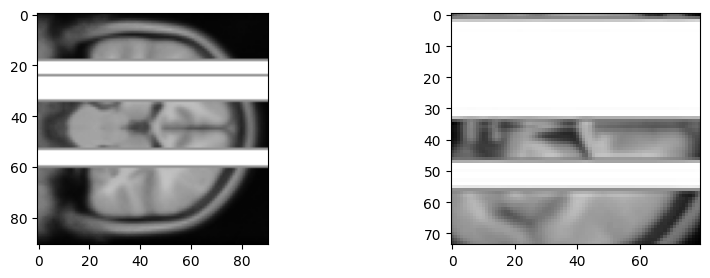

In [34]:
fig,ax=plt.subplots(1,2,figsize=(10,3))
ax[0].imshow(brain_mri_data[:,50,:],cmap='gray')
ax[1].imshow(brain_mri_resized_data[:,50,:],cmap='gray');

# Normalization and Standardization

In [35]:
mri_file=nib.load("dataset/avg152T1_LR_nifti.nii.gz")
mri_data=mri_file.get_fdata()

In [36]:
mean,std=np.mean(mri_data),np.std(mri_data)
mri_norm_data=(mri_data-mean)/std

In [38]:
mri_standardize=(mri_data-np.min(mri_data))/(np.max(mri_data)-np.min(mri_data))

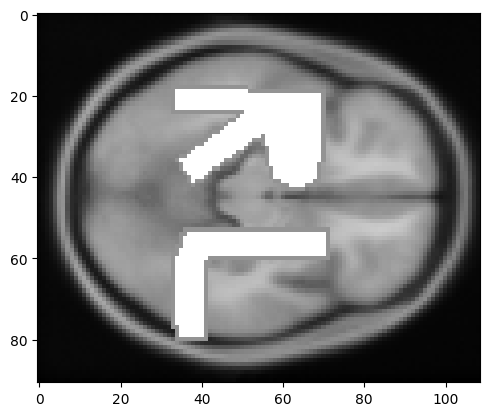

In [39]:
plt.imshow(mri_norm_data[:,:,30],cmap='gray')

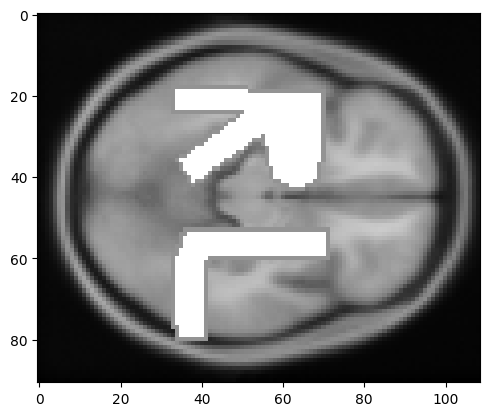

In [40]:
plt.imshow(mri_standardize[:,:,30],cmap='gray')